<div align="center">
    <font size=5> <b> MSDS 7333 Spring 2021: Case Study 05 </b></font>
</div>
<br>
<div align="center">
    <font size=3> <b> Missing Data Analysis </b> </font>
</div>

<br>
<div align="center">
    <font size=3> <b> Sachin Chavan,Tazeb Abera, Gautam Kapila, Sandesh Ojha </b> </font>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1">Import modules</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Business-Objective" data-toc-modified-id="Business-Objective-3">Business Objective</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-4">Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Fetch-California-housing-data" data-toc-modified-id="Fetch-California-housing-data-4.1">Fetch California housing data</a></span></li><li><span><a href="#Data-fields" data-toc-modified-id="Data-fields-4.2">Data fields</a></span></li><li><span><a href="#Structure-of-data" data-toc-modified-id="Structure-of-data-4.3">Structure of data</a></span></li><li><span><a href="#Data-Summary" data-toc-modified-id="Data-Summary-4.4">Data Summary</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-4.5">Missing values</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.6">Heatmap</a></span></li><li><span><a href="#Final-DataFrame" data-toc-modified-id="Final-DataFrame-4.7">Final DataFrame</a></span></li><li><span><a href="#Relationship-with-target" data-toc-modified-id="Relationship-with-target-4.8">Relationship with target</a></span></li></ul></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-5">Baseline Model</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-5.1">Train Test Split</a></span></li><li><span><a href="#Lasso-Model" data-toc-modified-id="Lasso-Model-5.2">Lasso Model</a></span></li><li><span><a href="#Residual-plot" data-toc-modified-id="Residual-plot-5.3">Residual plot</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-5.4">Prediction</a></span></li><li><span><a href="#No-autocorrelation-on-residuals" data-toc-modified-id="No-autocorrelation-on-residuals-5.5">No autocorrelation on residuals</a></span></li><li><span><a href="#Learning-Curve" data-toc-modified-id="Learning-Curve-5.6">Learning Curve</a></span></li></ul></li><li><span><a href="#Missing-Completely-at-random" data-toc-modified-id="Missing-Completely-at-random-6">Missing Completely at random</a></span><ul class="toc-item"><li><span><a href="#HouseAge---Missing-values" data-toc-modified-id="HouseAge---Missing-values-6.1">HouseAge - Missing values</a></span></li><li><span><a href="#HouseAge-Imputation" data-toc-modified-id="HouseAge-Imputation-6.2">HouseAge Imputation</a></span></li><li><span><a href="#Plot-imputed-values" data-toc-modified-id="Plot-imputed-values-6.3">Plot imputed values</a></span></li><li><span><a href="#Modeling-with-Imputed-Values" data-toc-modified-id="Modeling-with-Imputed-Values-6.4">Modeling with Imputed Values</a></span></li></ul></li><li><span><a href="#Missing-at-Random" data-toc-modified-id="Missing-at-Random-7">Missing at Random</a></span><ul class="toc-item"><li><span><a href="#HouseAge---Missing-values" data-toc-modified-id="HouseAge---Missing-values-7.1">HouseAge - Missing values</a></span></li><li><span><a href="#HouseAge-Imputation" data-toc-modified-id="HouseAge-Imputation-7.2">HouseAge Imputation</a></span></li><li><span><a href="#Plot-imputed-values" data-toc-modified-id="Plot-imputed-values-7.3">Plot imputed values</a></span></li><li><span><a href="#Modeling-with-Imputed-Values" data-toc-modified-id="Modeling-with-Imputed-Values-7.4">Modeling with Imputed Values</a></span></li></ul></li><li><span><a href="#Missing-not-at-random" data-toc-modified-id="Missing-not-at-random-8">Missing not at random</a></span><ul class="toc-item"><li><span><a href="#HouseAge---Missing-values" data-toc-modified-id="HouseAge---Missing-values-8.1">HouseAge - Missing values</a></span></li><li><span><a href="#HouseAge-Imputation" data-toc-modified-id="HouseAge-Imputation-8.2">HouseAge Imputation</a></span></li><li><span><a href="#Plot-imputed-values" data-toc-modified-id="Plot-imputed-values-8.3">Plot imputed values</a></span></li><li><span><a href="#Modeling-with-Imputed-Values" data-toc-modified-id="Modeling-with-Imputed-Values-8.4">Modeling with Imputed Values</a></span></li></ul></li><li><span><a href="#Result-Summary" data-toc-modified-id="Result-Summary-9">Result Summary</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10">Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-11">References</a></span></li></ul></div>

# Import modules

In [1]:
import sklearn.datasets as ds
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')
#sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

# Introduction 

The real-world data often has a lot of missing values.Missing data can range from variables without observations to specific data questions without any known answers. Causes include human error in data collection, system malfunctions, corruption of data, or a number of other unintended origins.

It is good practice to identify and replace missing values for each column in the input data prior to modeling in prediction task. This is called missing data imputation, or imputing for short. A popular approach for data imputation is to calculate a statistical value for each column (such as a mean) and replace all missing values for that column with the statistic. It is a popular approach because the statistic is easy to calculate using the training dataset and because it often results in good performance.


# Business Objective 

# Data Exploration 

The California Housing data set is provided as part of the SKLearn package in the [SKLearn website](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).

## Fetch California housing data

In [2]:
housing_df = ds.fetch_california_housing(as_frame=True).data
target_df  = ds.fetch_california_housing(as_frame=True).target

In [3]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


## Data fields


- MedInc - Median Income in block
- HouseAge - Median house age in block
- AveRooms - Average number of rooms
- AveBedrms - Average number of bedrooms
- Population - Block population
- AveOccup - Average house occupancy
- Latitude - House Block Latitude
- Longitude - House Block Longitude


## Structure of data

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


## Data Summary

In [5]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Missing values

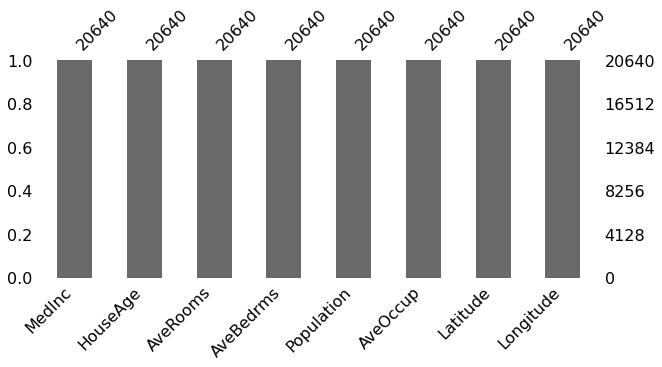

In [6]:
msno.bar(housing_df,figsize=(10, 4)) 

Original dataset has no missing values

## Heatmap

Longitude and lattitude are corrleated so logitude has been removed from the features. Here is heatmap after excluding longitude.

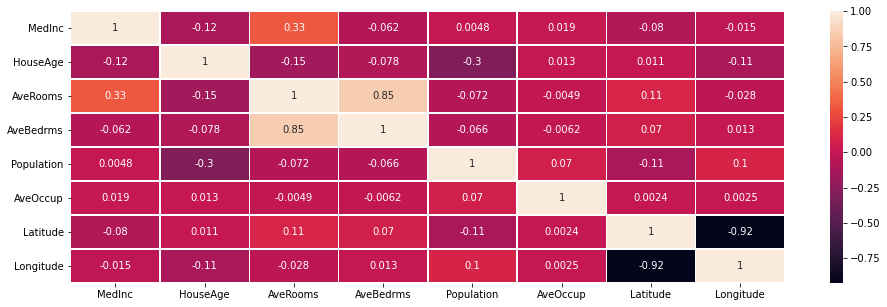

In [7]:
features =  ['MedInc','HouseAge','AveRooms','Population','AveOccup', 'Latitude']
plt.figure(figsize = (16,5))
sns.heatmap(housing_df.corr(), annot=True, linewidths=.5)

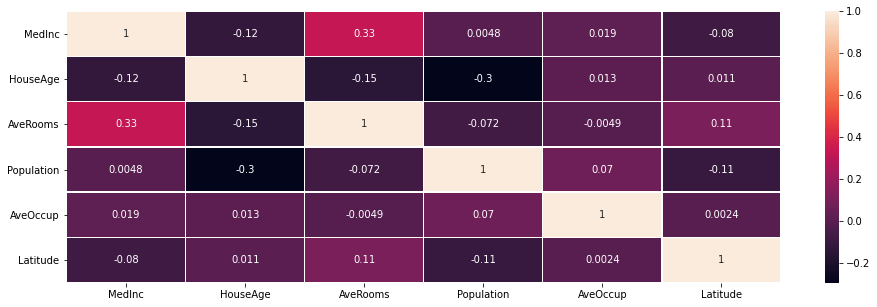

In [8]:
plt.figure(figsize = (16,5))
sns.heatmap(housing_df[features].corr(), annot=True, linewidths=.5)

## Final DataFrame

In [9]:
df = housing_df[features].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   Population  20640 non-null  float64
 4   AveOccup    20640 non-null  float64
 5   Latitude    20640 non-null  float64
dtypes: float64(6)
memory usage: 967.6 KB


## Relationship with target

Important variables with linear relationship with target are

* Median Income
* Average number of rooms
* Average number of bedrooms
* Population

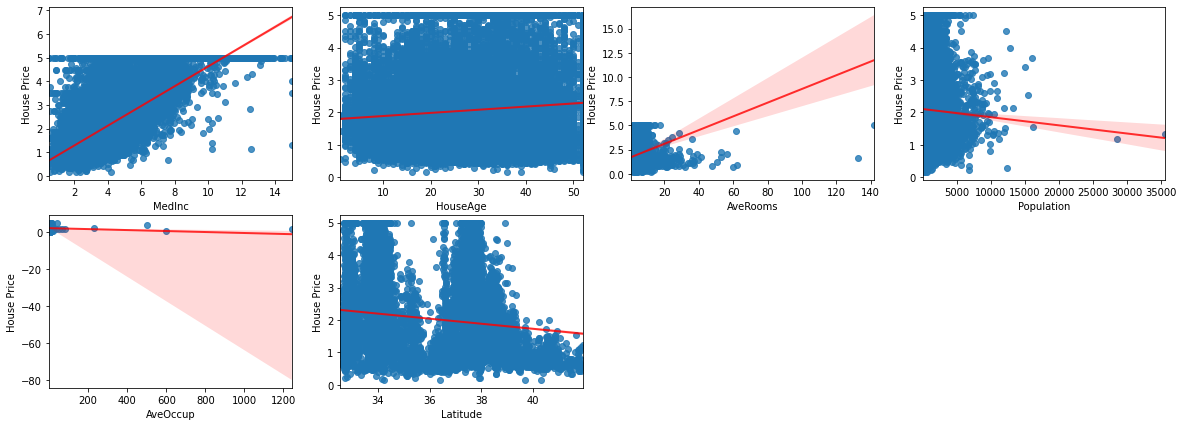

In [10]:
plt.figure(figsize=(20,7))
import numpy as np
for i in range(len(list(df.columns))):
    plt.subplot(2, 4, i+1) 
    sns.regplot(x=np.array(df.iloc[:,i]),y=np.array(target_df),
                line_kws={"color":"r","alpha":0.8,"lw":2})
    plt.xlabel(list(df.columns)[i])
    plt.ylabel('House Price')
plt.show()

# Baseline Model

## Train Test Split

Split the data into 80/20 train/test set respectively.

In [11]:
X_train, X_test, y_train, y_test = train_test_split( housing_df[features], target_df, test_size=0.3, random_state=100)
ss = StandardScaler().fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled  = ss.transform(X_test)

## Lasso Model

**Select $\alpha$ for LASSO model**

from the below plot we see $\alpha = 0.002$ 


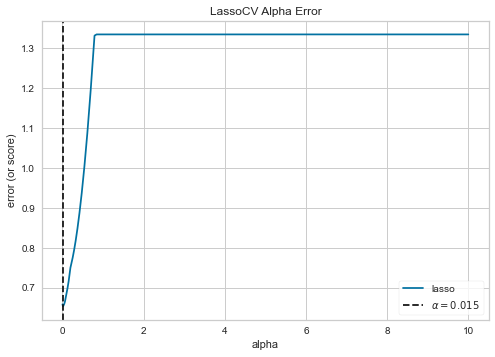

In [12]:
import numpy as np
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

In [13]:
base_model = linear_model.Lasso(alpha=0.009)
base_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.009)

## Residual plot

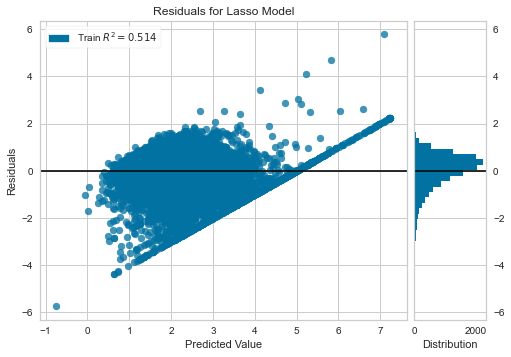

In [14]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

# Instantiate and fit the visualizer
model = linear_model.Lasso(alpha=0.009)
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_train_scaled, y_train)
visualizer_residuals.show()

## Prediction

In [17]:
y_pred = base_model.predict(X_test_scaled)

reg_metric = [ mean_absolute_error(y_test,y_pred),
               mean_squared_error(y_test,y_pred),
               rmse(y_test,y_pred),
               r2_score(y_test,y_pred)]

baseline_df = pd.DataFrame.from_dict(reg_metric).transpose().reset_index().rename(columns={'index':'Variable',
                                                                               0 :'MAE',
                                                                               1 :'MSE',
                                                                               2 :'RMSE',
                                                                               3 :'R2' })


baseline_df

,Variable,MAE,MSE,RMSE,R2
0,0,0.591535,0.616964,0.785471,0.534175


## No autocorrelation on residuals

* $H_0$ : Autocorrelation is absent
* $H_1$ : Autocorrelation is present
    

In [18]:
from statsmodels.stats import diagnostic as diag

residuals = y_test.values-y_pred
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.5625496223762024

## Learning Curve

# Missing Completely at random 

For this analysis HouseAge, will be manipulated to replace 1%, 5%, 10%, 20%, 33% and 50% of the original data values with NaN at random.

## HouseAge - Missing values

In [19]:
missing_dist = [(1, 'HouseAge_1' ,'HouseAge_ind1'),
                (5, 'HouseAge_5' ,'HouseAge_ind5'),
                (10,'HouseAge_10','HouseAge_ind10'),
                (20,'HouseAge_20','HouseAge_ind20'),
                (33,'HouseAge_33','HouseAge_ind33'),
                (50,'HouseAge_50','HouseAge_ind50')]
df_mcr = df.copy()
for i_tup in missing_dist:
    df_mcr[i_tup[1]] = df_mcr['HouseAge']
    df_mcr[i_tup[1]][df_mcr.HouseAge.sample(frac=(i_tup[0]/100)).index] = np.nan 
    df_mcr[i_tup[2]] = [ 1 if np.math.isnan(value) else 0 for value in df_mcr[i_tup[1]]]



In [20]:
print('Missingness percentage on HouseAge')
print((df_mcr.isna().sum()/len(df_mcr))*100)

Missingness percentage on HouseAge
MedInc             0.000000
HouseAge           0.000000
AveRooms           0.000000
Population         0.000000
AveOccup           0.000000
Latitude           0.000000
HouseAge_1         0.998062
HouseAge_ind1      0.000000
HouseAge_5         5.000000
HouseAge_ind5      0.000000
HouseAge_10       10.000000
HouseAge_ind10     0.000000
HouseAge_20       20.000000
HouseAge_ind20     0.000000
HouseAge_33       32.999031
HouseAge_ind33     0.000000
HouseAge_50       50.000000
HouseAge_ind50     0.000000
dtype: float64


## HouseAge Imputation

In [21]:
%%capture impute_cap
df_mcr_imputed = df_mcr.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', copy=False)
imputer.fit(df_mcr_imputed)
mcr_imputed = imputer.transform(df_mcr_imputed)
df_mcr_imputed = pd.DataFrame(mcr_imputed, columns = df_mcr.columns)

**Missingness after imputation**

In [22]:
print('Missingness percentage on HouseAge')
print((df_mcr_imputed.isna().sum()/len(df_mcr_imputed))*100)

Missingness percentage on HouseAge
MedInc            0.0
HouseAge          0.0
AveRooms          0.0
Population        0.0
AveOccup          0.0
Latitude          0.0
HouseAge_1        0.0
HouseAge_ind1     0.0
HouseAge_5        0.0
HouseAge_ind5     0.0
HouseAge_10       0.0
HouseAge_ind10    0.0
HouseAge_20       0.0
HouseAge_ind20    0.0
HouseAge_33       0.0
HouseAge_ind33    0.0
HouseAge_50       0.0
HouseAge_ind50    0.0
dtype: float64


## Plot imputed values

In [23]:
#plt.figure(figsize=(20,7))
#import numpy as np
#for i in range(len(list(df.columns))):
#    plt.subplot(2, 4, i+1) 
#    sns.regplot(x=np.array(df.iloc[:,i]),y=np.array(target_df),
#                line_kws={"color":"r","alpha":0.8,"lw":2})
#    plt.xlabel(list(df.columns)[i])
#    plt.ylabel('House Price')
#plt.show()

## Modeling with Imputed Values

In [24]:
imputed_model = linear_model.Lasso(alpha=0.009)
reg_metric = {}  

for i_tuple in missing_dist:
    features[1]= i_tuple[1]
    X_train, X_test, y_train, y_test = train_test_split( df_mcr_imputed[features], target_df, 
                                                         test_size=0.3, random_state=100)
    ss = StandardScaler().fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled  = ss.transform(X_test)
    imputed_model.fit(X_train_scaled, y_train)
    
    y_pred = imputed_model.predict(X_test_scaled)
    # ['MAE','MSE','RMSE','R2']
    reg_metric[i_tuple[1]] = [ mean_absolute_error(y_test,y_pred),
                               mean_squared_error(y_test,y_pred),
                               rmse(y_test,y_pred),
                               r2_score(y_test,y_pred)]

mcr_df = pd.DataFrame.from_dict(reg_metric).transpose().reset_index().rename(columns={'index':'Variable',
                                                                               0 :'MAE',
                                                                               1 :'MSE',
                                                                               2 :'RMSE',
                                                                               3 :'R2' })
mcr_df

,Variable,MAE,MSE,RMSE,R2
0,HouseAge_1,0.591545,0.617076,0.785542,0.534091
1,HouseAge_5,0.591786,0.618126,0.786210,0.533298
2,HouseAge_10,0.593112,0.620247,0.787557,0.531697
3,HouseAge_20,0.597952,0.626562,0.791556,0.526929
4,HouseAge_33,0.598392,0.632337,0.795196,0.522569
5,HouseAge_50,0.601318,0.637748,0.798591,0.518483


# Missing at Random

For this analysis same variable HouseAge, will be manipulated to replace 10%, 20% and 30%of the original data values with NaN at random.

## HouseAge - Missing values

In [25]:
#np.percentile(df.Population.values,50)
missing_dist = [(20,'HouseAge_10','HouseAge_ind10'),
                (40,'HouseAge_20','HouseAge_ind20'),
                (60,'HouseAge_30','HouseAge_ind30')]

df_mar = df.copy()
for i_tup in missing_dist:
    df_mar[i_tup[1]] = df['HouseAge']
    df_mar[i_tup[1]][df_mar[df_mar['Population'] <=1166.0].sample(frac=(i_tup[0]/100)).index] = np.nan 
    df_mar[i_tup[2]] = [ 1 if np.math.isnan(value) else 0 for value in df_mar[i_tup[1]]]


    

In [26]:
print('Missingness percentage on HouseAge')
print((df_mar.isna().sum()/len(df_mar))*100)
print(i_tup[0])

Missingness percentage on HouseAge
MedInc             0.000000
HouseAge           0.000000
AveRooms           0.000000
Population         0.000000
AveOccup           0.000000
Latitude           0.000000
HouseAge_10       10.004845
HouseAge_ind10     0.000000
HouseAge_20       20.009690
HouseAge_ind20     0.000000
HouseAge_30       30.014535
HouseAge_ind30     0.000000
dtype: float64
60


## HouseAge Imputation

In [27]:
%%capture impute_cap
df_mar_imputed = df_mar.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', copy=False)
imputer.fit(df_mar_imputed)
mar_imputed = imputer.transform(df_mar_imputed)
df_mar_imputed = pd.DataFrame(mar_imputed, columns = df_mar.columns)

**Missingness after imputation**

In [28]:
print('Missingness percentage on HouseAge')
print((df_mar.isna().sum()/len(df_mar))*100)
print(i_tup[0])

Missingness percentage on HouseAge
MedInc             0.000000
HouseAge           0.000000
AveRooms           0.000000
Population         0.000000
AveOccup           0.000000
Latitude           0.000000
HouseAge_10       10.004845
HouseAge_ind10     0.000000
HouseAge_20       20.009690
HouseAge_ind20     0.000000
HouseAge_30       30.014535
HouseAge_ind30     0.000000
dtype: float64
60


## Plot imputed values

## Modeling with Imputed Values

In [29]:
imputed_model = linear_model.Lasso(alpha=0.009)
reg_metric = {}  

for i_tuple in missing_dist:
    features[1]= i_tuple[1]
    X_train, X_test, y_train, y_test = train_test_split( df_mar_imputed[features], target_df, 
                                                         test_size=0.3, random_state=100)
    ss = StandardScaler().fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled  = ss.transform(X_test)
    imputed_model.fit(X_train_scaled, y_train)
    
    y_pred = imputed_model.predict(X_test_scaled)
    # ['MAE','MSE','RMSE','R2']
    reg_metric[i_tuple[1]] = [ mean_absolute_error(y_test,y_pred),
                               mean_squared_error(y_test,y_pred),
                               rmse(y_test,y_pred),
                               r2_score(y_test,y_pred)]

mar_df = pd.DataFrame.from_dict(reg_metric).transpose().reset_index().rename(columns={'index':'Variable',
                                                                               0 :'MAE',
                                                                               1 :'MSE',
                                                                               2 :'RMSE',
                                                                               3 :'R2' })

mar_df

,Variable,MAE,MSE,RMSE,R2
0,HouseAge_10,0.593854,0.622303,0.788862,0.530144
1,HouseAge_20,0.596139,0.625579,0.790936,0.527671
2,HouseAge_30,0.596965,0.629927,0.793679,0.524388


# Missing not at random

For this analysis same variable HouseAge, will be manipulated to replace  25% of the original data values with NaN at random.

## HouseAge - Missing values


In [30]:
#np.percentile(df.Population.values,50)
missing_dist = [(71,'HouseAge_25','HouseAge_ind25')]

df_mnar = df.copy()
for i_tup in missing_dist:
    df_mnar[i_tup[1]] = df['HouseAge']
    df_mnar[i_tup[1]][df_mnar[df_mar['MedInc'] <3].sample(frac=(i_tup[0]/100)).index] = np.nan 
    df_mnar[i_tup[2]] = [ 1 if np.math.isnan(value) else 0 for value in df_mnar[i_tup[1]]]



In [31]:
print('Missingness percentage on HouseAge')
print((df_mnar.isna().sum()/len(df_mnar))*100)
print(i_tup[0])

Missingness percentage on HouseAge
MedInc             0.000000
HouseAge           0.000000
AveRooms           0.000000
Population         0.000000
AveOccup           0.000000
Latitude           0.000000
HouseAge_25       25.334302
HouseAge_ind25     0.000000
dtype: float64
71


## HouseAge Imputation

In [32]:
%%capture impute_cap
df_mnar_imputed = df_mnar.copy()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', copy=False)
imputer.fit(df_mnar_imputed)
mnar_imputed = imputer.transform(df_mnar_imputed)
df_mnar_imputed = pd.DataFrame(mnar_imputed, columns = df_mnar.columns)

**Missingness after imputation**

In [33]:
print('Missingness percentage on HouseAge')
print((df_mnar.isna().sum()/len(df_mnar))*100)
print(i_tup[0])

Missingness percentage on HouseAge
MedInc             0.000000
HouseAge           0.000000
AveRooms           0.000000
Population         0.000000
AveOccup           0.000000
Latitude           0.000000
HouseAge_25       25.334302
HouseAge_ind25     0.000000
dtype: float64
71


## Plot imputed values

## Modeling with Imputed Values

In [34]:
imputed_model = linear_model.Lasso(alpha=0.009)
reg_metric = {}  

for i_tuple in missing_dist:
    features[1]= i_tuple[1]
    X_train, X_test, y_train, y_test = train_test_split( df_mnar_imputed[features], target_df, 
                                                         test_size=0.3, random_state=100)
    ss = StandardScaler().fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled  = ss.transform(X_test)
    imputed_model.fit(X_train_scaled, y_train)
    
    y_pred = imputed_model.predict(X_test_scaled)
    # ['MAE','MSE','RMSE','R2']
    reg_metric[i_tuple[1]] = [ mean_absolute_error(y_test,y_pred),
                               mean_squared_error(y_test,y_pred),
                               rmse(y_test,y_pred),
                               r2_score(y_test,y_pred)]

mnar_df = pd.DataFrame.from_dict(reg_metric).transpose().reset_index().rename(columns={'index':'Variable',
                                                                               0 :'MAE',
                                                                               1 :'MSE',
                                                                               2 :'RMSE',
                                                                               3 :'R2' })


mnar_df

,Variable,MAE,MSE,RMSE,R2
0,HouseAge_25,0.589163,0.615524,0.784554,0.535262


# Result Summary

In [35]:
baseline_df

,Variable,MAE,MSE,RMSE,R2
0,0,0.591535,0.616964,0.785471,0.534175


In [36]:
mcr_df

,Variable,MAE,MSE,RMSE,R2
0,HouseAge_1,0.591545,0.617076,0.785542,0.534091
1,HouseAge_5,0.591786,0.618126,0.786210,0.533298
2,HouseAge_10,0.593112,0.620247,0.787557,0.531697
3,HouseAge_20,0.597952,0.626562,0.791556,0.526929
4,HouseAge_33,0.598392,0.632337,0.795196,0.522569
5,HouseAge_50,0.601318,0.637748,0.798591,0.518483


In [37]:
mar_df

,Variable,MAE,MSE,RMSE,R2
0,HouseAge_10,0.593854,0.622303,0.788862,0.530144
1,HouseAge_20,0.596139,0.625579,0.790936,0.527671
2,HouseAge_30,0.596965,0.629927,0.793679,0.524388


In [38]:
mnar_df

,Variable,MAE,MSE,RMSE,R2
0,HouseAge_25,0.589163,0.615524,0.784554,0.535262


# Conclusion 